# Feature Selection for Software Defect Prediction

This notebook implements various feature selection techniques to identify the most important features for software defect prediction in aerospace applications.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Loading Preprocessed Data

In [21]:
# Load the preprocessed data
try:
    df = pd.read_csv('preprocessed_data.csv')
    print(f"Dataset loaded successfully with shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully with shape: (1676, 22)


## Create Target Variable

In [22]:
# Determine if we need to create a binary target
if 'defect' not in df.columns:
    print("Creating a synthetic 'defect' target for demonstration purposes...")
    # For demonstration purposes only - in real projects use actual defect data
    # Using 'LOC_TOTAL' as a threshold (this would typically be your actual defect label)
    threshold = df['LOC_TOTAL'].quantile(0.75)  # Using the 75th percentile as threshold
    df['defect'] = (df['LOC_TOTAL'] > threshold).astype(int)
    print(f"Created target with {df['defect'].sum()} defect samples out of {len(df)} total samples")

# Check class distribution
print("\nClass distribution:")
print(df['defect'].value_counts(normalize=True) * 100)

Creating a synthetic 'defect' target for demonstration purposes...
Created target with 416 defect samples out of 1676 total samples

Class distribution:
defect
0    75.178998
1    24.821002
Name: proportion, dtype: float64


## Prepare Data for Feature Selection

In [23]:
# Separate features and target
X = df.drop(['defect', 'LOC_TOTAL'], axis=1)  # Remove target and the column used to define it
y = df['defect']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n--- FEATURE SELECTION METHODS ---")


Features shape: (1676, 21)
Target shape: (1676,)

--- FEATURE SELECTION METHODS ---


## 1. Univariate Selection - ANOVA F-value


1. Univariate Selection (ANOVA F-value):


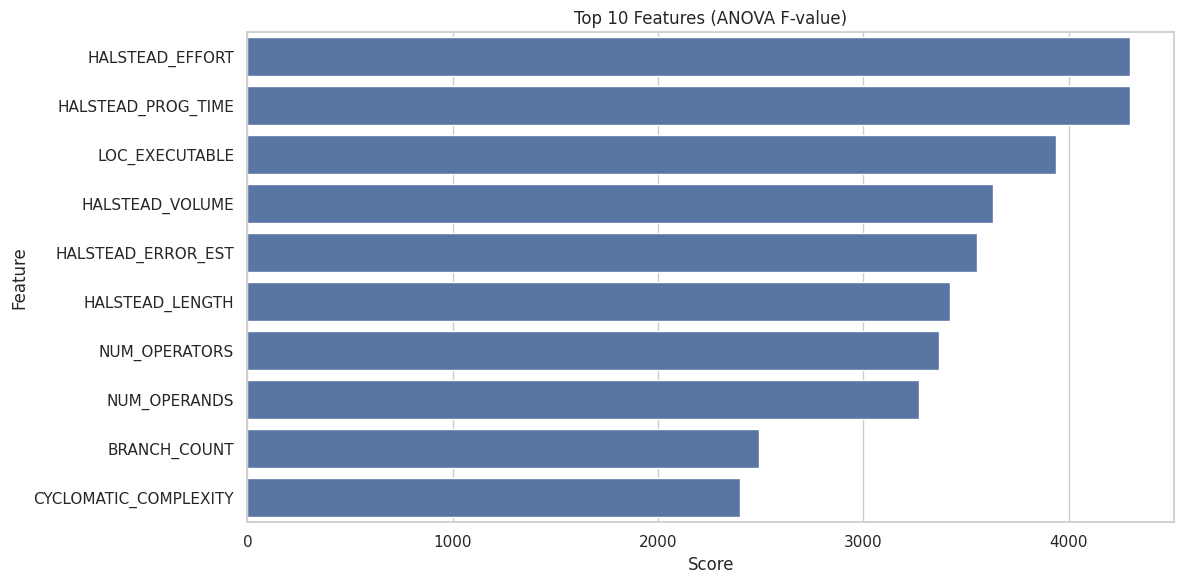

Top 10 features by ANOVA F-value:
                  Feature        Score
11        HALSTEAD_EFFORT  4298.328885
15     HALSTEAD_PROG_TIME  4298.325533
8          LOC_EXECUTABLE  3939.069703
16        HALSTEAD_VOLUME  3630.415394
12     HALSTEAD_ERROR_EST  3551.688436
13        HALSTEAD_LENGTH  3422.881803
18          NUM_OPERATORS  3369.087551
17           NUM_OPERANDS  3272.212302
2            BRANCH_COUNT  2490.028102
5   CYCLOMATIC_COMPLEXITY  2401.022436


In [24]:
print("\n1. Univariate Selection (ANOVA F-value):")
selector_f = SelectKBest(score_func=f_classif, k=10)
selector_f.fit(X_train, y_train)

# Get scores and create dataframe for visualization
f_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_f.scores_
})
f_scores = f_scores.sort_values('Score', ascending=False)

# Plot the scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=f_scores[:10])
plt.title('Top 10 Features (ANOVA F-value)')
plt.tight_layout()
plt.savefig('feature_selection_anova.png')
plt.show()

print("Top 10 features by ANOVA F-value:")
print(f_scores[:10])

## 2. Mutual Information


2. Mutual Information:


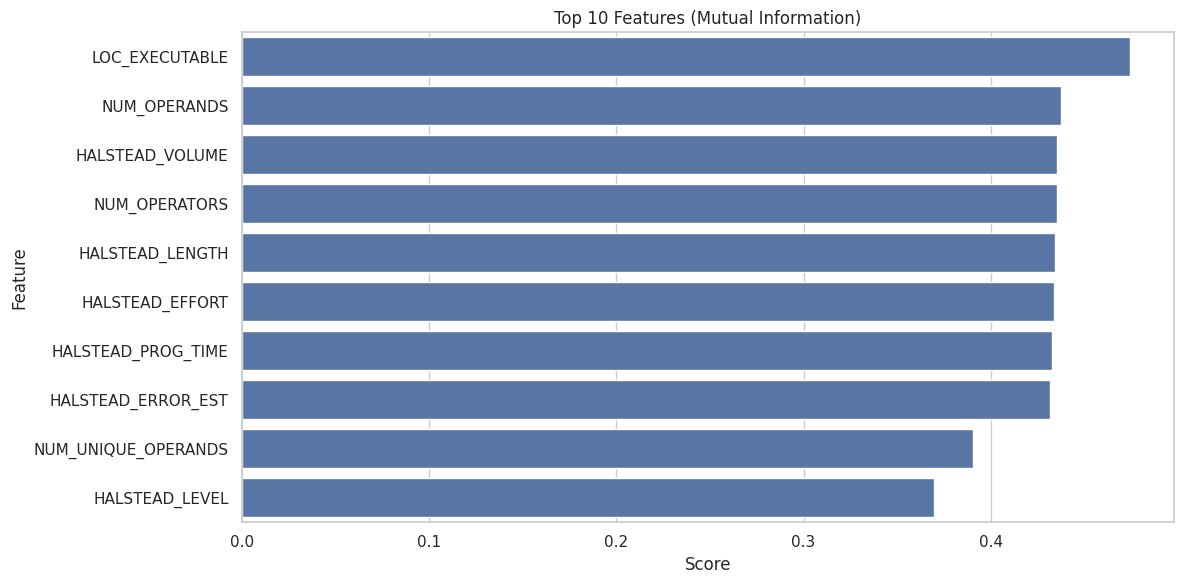

Top 10 features by Mutual Information:
                Feature     Score
8        LOC_EXECUTABLE  0.474169
17         NUM_OPERANDS  0.437336
16      HALSTEAD_VOLUME  0.435555
18        NUM_OPERATORS  0.435346
13      HALSTEAD_LENGTH  0.434198
11      HALSTEAD_EFFORT  0.434004
15   HALSTEAD_PROG_TIME  0.432494
12   HALSTEAD_ERROR_EST  0.431405
19  NUM_UNIQUE_OPERANDS  0.390715
14       HALSTEAD_LEVEL  0.369631


In [25]:
print("\n2. Mutual Information:")
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
selector_mi.fit(X_train, y_train)

# Get scores
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_mi.scores_
})
mi_scores = mi_scores.sort_values('Score', ascending=False)

# Plot the scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=mi_scores[:10])
plt.title('Top 10 Features (Mutual Information)')
plt.tight_layout()
plt.savefig('feature_selection_mi.png')
plt.show()

print("Top 10 features by Mutual Information:")
print(mi_scores[:10])

## 3. Feature Importance using Random Forest


3. Feature Importance (Random Forest):


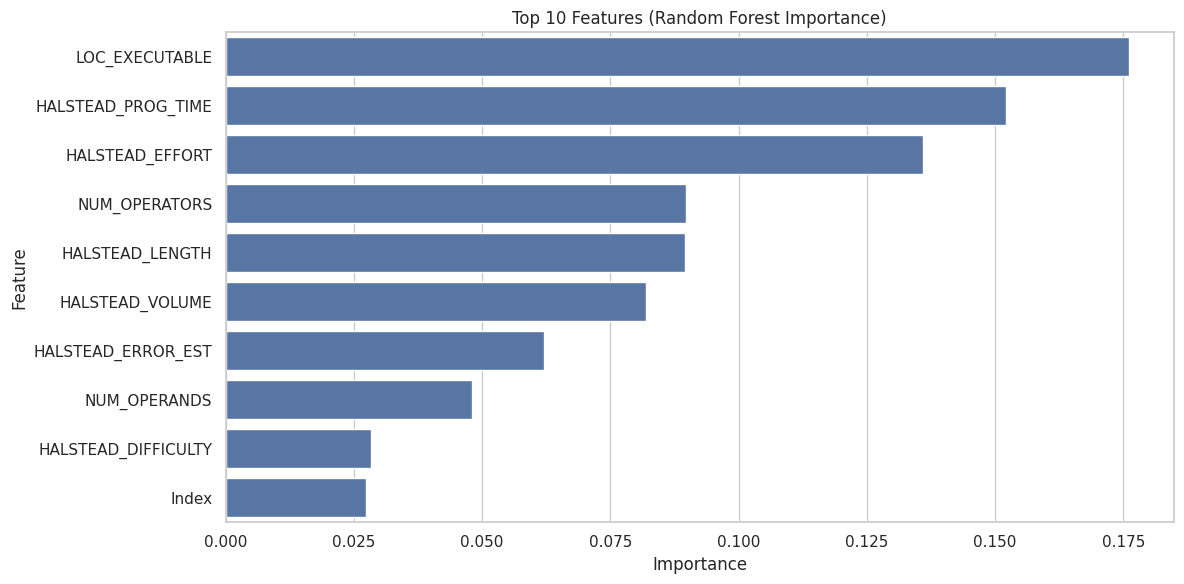

Top 10 features by Random Forest Importance:
                Feature  Importance
8        LOC_EXECUTABLE    0.176049
15   HALSTEAD_PROG_TIME    0.152159
11      HALSTEAD_EFFORT    0.135869
18        NUM_OPERATORS    0.089766
13      HALSTEAD_LENGTH    0.089586
16      HALSTEAD_VOLUME    0.081856
12   HALSTEAD_ERROR_EST    0.062103
17         NUM_OPERANDS    0.048076
10  HALSTEAD_DIFFICULTY    0.028410
0                 Index    0.027288


In [26]:
print("\n3. Feature Importance (Random Forest):")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})
rf_importances = rf_importances.sort_values('Importance', ascending=False)

# Plot the importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances[:10])
plt.title('Top 10 Features (Random Forest Importance)')
plt.tight_layout()
plt.savefig('feature_selection_rf.png')
plt.show()

print("Top 10 features by Random Forest Importance:")
print(rf_importances[:10])

## 4. Feature Importance using Extra Trees


4. Feature Importance (Extra Trees):


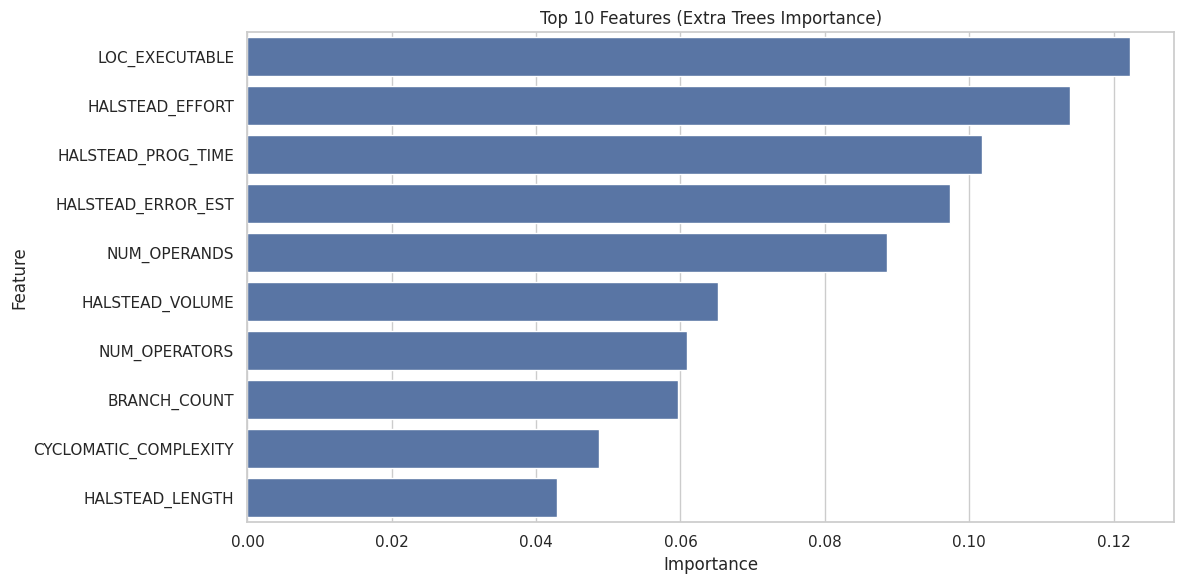

Top 10 features by Extra Trees Importance:
                  Feature  Importance
8          LOC_EXECUTABLE    0.122268
11        HALSTEAD_EFFORT    0.113970
15     HALSTEAD_PROG_TIME    0.101791
12     HALSTEAD_ERROR_EST    0.097348
17           NUM_OPERANDS    0.088553
16        HALSTEAD_VOLUME    0.065158
18          NUM_OPERATORS    0.060939
2            BRANCH_COUNT    0.059725
5   CYCLOMATIC_COMPLEXITY    0.048723
13        HALSTEAD_LENGTH    0.042917


In [27]:
print("\n4. Feature Importance (Extra Trees):")
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

# Get feature importances
et_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': et.feature_importances_
})
et_importances = et_importances.sort_values('Importance', ascending=False)

# Plot the importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=et_importances[:10])
plt.title('Top 10 Features (Extra Trees Importance)')
plt.tight_layout()
plt.savefig('feature_selection_et.png')
plt.show()

print("Top 10 features by Extra Trees Importance:")
print(et_importances[:10])

## 5. Recursive Feature Elimination (RFE)

In [28]:
print("\n5. Recursive Feature Elimination (RFE):")
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get selected features
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Rank': rfe.ranking_
})
rfe_selected = rfe_features[rfe_features['Selected']].sort_values('Rank')

print("Features selected by RFE:")
print(rfe_selected)


5. Recursive Feature Elimination (RFE):
Features selected by RFE:
                 Feature  Selected  Rank
1              LOC_BLANK      True     1
8         LOC_EXECUTABLE      True     1
9       HALSTEAD_CONTENT      True     1
10   HALSTEAD_DIFFICULTY      True     1
11       HALSTEAD_EFFORT      True     1
14        HALSTEAD_LEVEL      True     1
15    HALSTEAD_PROG_TIME      True     1
17          NUM_OPERANDS      True     1
19   NUM_UNIQUE_OPERANDS      True     1
20  NUM_UNIQUE_OPERATORS      True     1


## 6. Feature selection based on correlation matrix


6. Correlation Matrix Analysis:
Found 14 highly correlated features that could be removed:
['CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS']


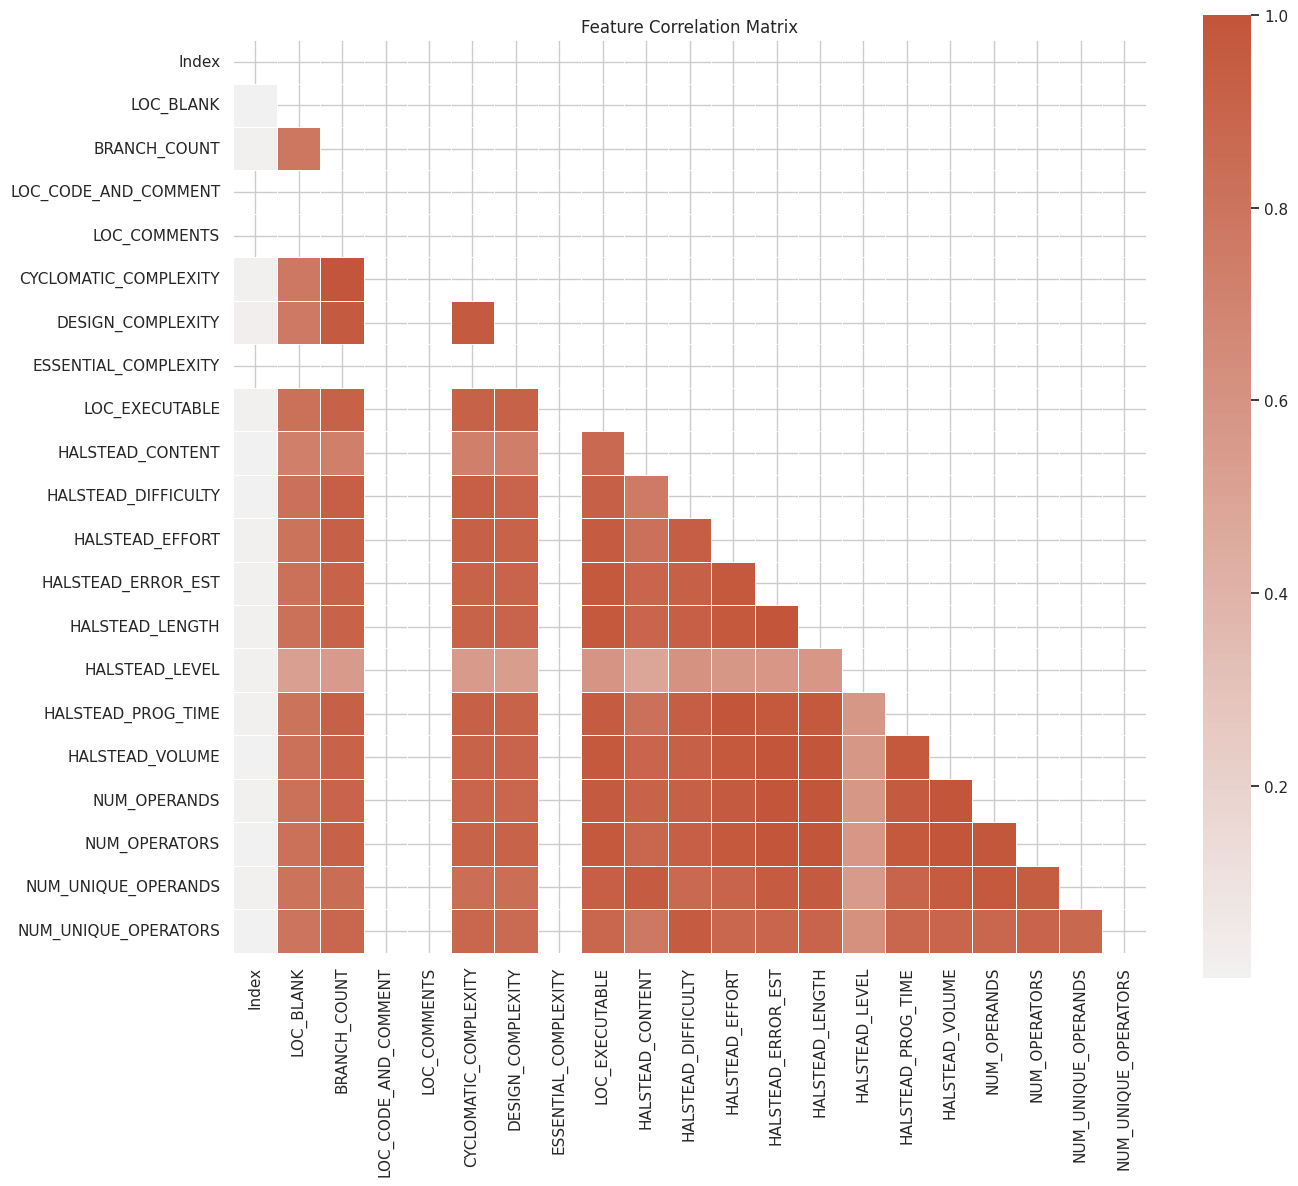

In [29]:
print("\n6. Correlation Matrix Analysis:")
# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

print(f"Found {len(high_corr)} highly correlated features that could be removed:")
print(high_corr)

# Plot correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=False)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

## Consolidate Results Across Methods


--- CONSOLIDATED RESULTS ---

Consolidated feature ranking (number of times a feature appears in top selections):
                  Feature  Score
8          LOC_EXECUTABLE      4
15     HALSTEAD_PROG_TIME      4
17           NUM_OPERANDS      4
11        HALSTEAD_EFFORT      4
13        HALSTEAD_LENGTH      3
12     HALSTEAD_ERROR_EST      3
16        HALSTEAD_VOLUME      3
18          NUM_OPERATORS      3
14         HALSTEAD_LEVEL      2
2            BRANCH_COUNT      2
5   CYCLOMATIC_COMPLEXITY      1
1               LOC_BLANK      1
0                   Index      1
19    NUM_UNIQUE_OPERANDS      1
10    HALSTEAD_DIFFICULTY      1


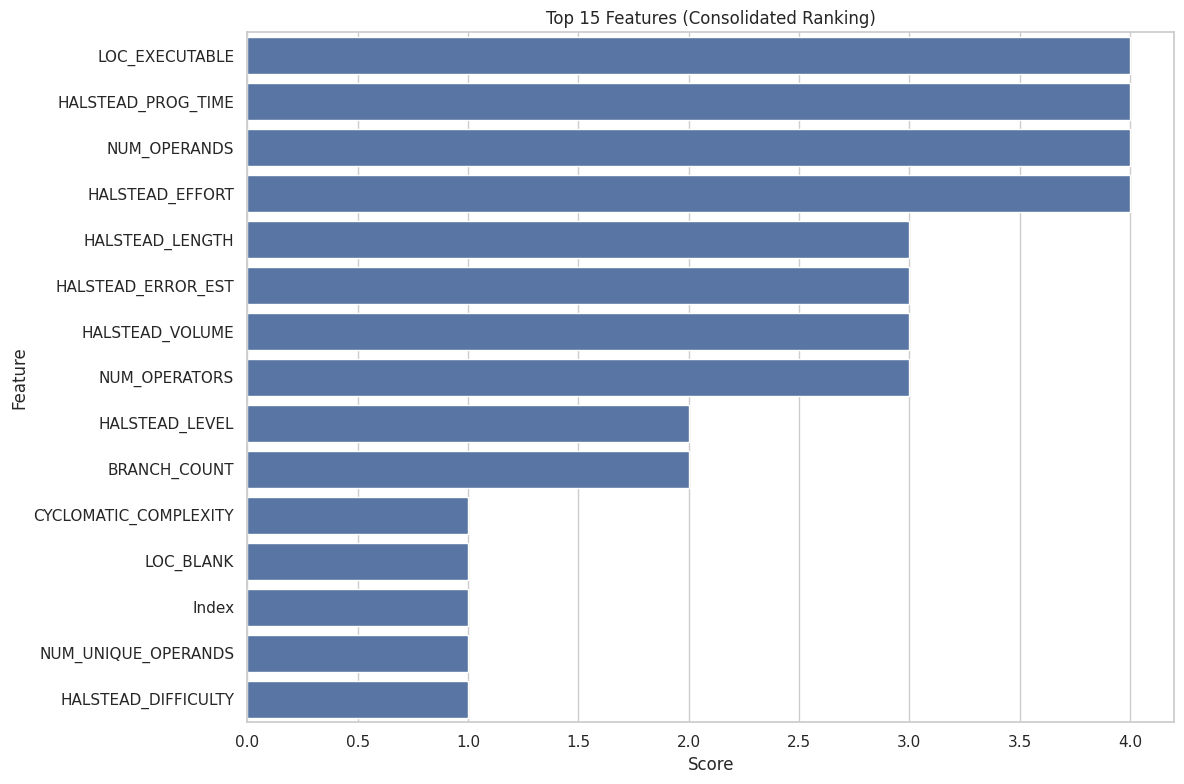

In [30]:
print("\n--- CONSOLIDATED RESULTS ---")

# Count how many times each feature appears in the top 10 across methods
feature_counts = {}
for feature in X.columns:
    count = 0
    if feature in f_scores[:10]['Feature'].values:
        count += 1
    if feature in mi_scores[:10]['Feature'].values:
        count += 1
    if feature in rf_importances[:10]['Feature'].values:
        count += 1
    if feature in et_importances[:10]['Feature'].values:
        count += 1
    if feature in rfe_selected['Feature'].values:
        count += 1

    # Subtract points for highly correlated features
    if feature in high_corr:
        count -= 1

    feature_counts[feature] = count

# Convert to DataFrame for better visualization
feature_ranking = pd.DataFrame({
    'Feature': list(feature_counts.keys()),
    'Score': list(feature_counts.values())
})
feature_ranking = feature_ranking.sort_values('Score', ascending=False)

print("\nConsolidated feature ranking (number of times a feature appears in top selections):")
print(feature_ranking.head(15))

# Plot consolidated ranking
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_ranking.head(15))
plt.title('Top 15 Features (Consolidated Ranking)')
plt.tight_layout()
plt.savefig('feature_consolidated_ranking.png')
plt.show()

## Model Evaluation with Different Feature Sets

In [31]:
print("\n--- MODEL EVALUATION WITH DIFFERENT FEATURE SETS ---")

def evaluate_feature_set(features, name):
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]

    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "SVM": SVC(random_state=42)
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)
        results[model_name] = acc

    print(f"\nFeature set: {name} ({len(features)} features)")
    for model_name, acc in results.items():
        print(f"{model_name}: {acc:.4f}")

    return results


--- MODEL EVALUATION WITH DIFFERENT FEATURE SETS ---


In [32]:
# Top 5 features from consolidated ranking
top5_features = feature_ranking.head(5)['Feature'].tolist()
results_top5 = evaluate_feature_set(top5_features, "Top 5 consolidated")


Feature set: Top 5 consolidated (5 features)
Random Forest: 0.9761
Decision Tree: 0.9662
Logistic Regression: 0.9742
SVM: 0.9662


In [33]:
# Top 10 features from consolidated ranking
top10_features = feature_ranking.head(10)['Feature'].tolist()
results_top10 = evaluate_feature_set(top10_features, "Top 10 consolidated")


Feature set: Top 10 consolidated (10 features)
Random Forest: 0.9761
Decision Tree: 0.9662
Logistic Regression: 0.9781
SVM: 0.9602


In [34]:
# Top 10 features from Random Forest
top10_rf = rf_importances.head(10)['Feature'].tolist()
results_rf = evaluate_feature_set(top10_rf, "Top 10 Random Forest")


Feature set: Top 10 Random Forest (10 features)
Random Forest: 0.9742
Decision Tree: 0.9781
Logistic Regression: 0.9742
SVM: 0.9622


In [35]:
# Top 10 features from ANOVA
top10_anova = f_scores.head(10)['Feature'].tolist()
results_anova = evaluate_feature_set(top10_anova, "Top 10 ANOVA")


Feature set: Top 10 ANOVA (10 features)
Random Forest: 0.9742
Decision Tree: 0.9662
Logistic Regression: 0.9781
SVM: 0.9602


In [36]:
# All features except highly correlated ones
all_except_correlated = [f for f in X.columns if f not in high_corr]
results_no_corr = evaluate_feature_set(all_except_correlated, "All except correlated")


Feature set: All except correlated (7 features)
Random Forest: 0.9245
Decision Tree: 0.8887
Logistic Regression: 0.9185
SVM: 0.9245


## Save Final Recommended Feature Set

In [37]:
# Save final recommended feature set
recommended_features = feature_ranking.head(10)['Feature'].tolist()
with open('recommended_features.txt', 'w') as f:
    f.write("Recommended features for software defect prediction:\n\n")
    for i, feature in enumerate(recommended_features, 1):
        f.write(f"{i}. {feature}\n")

print("\nFinal recommended features have been saved to 'recommended_features.txt'")


Final recommended features have been saved to 'recommended_features.txt'


## Comparison Visualization

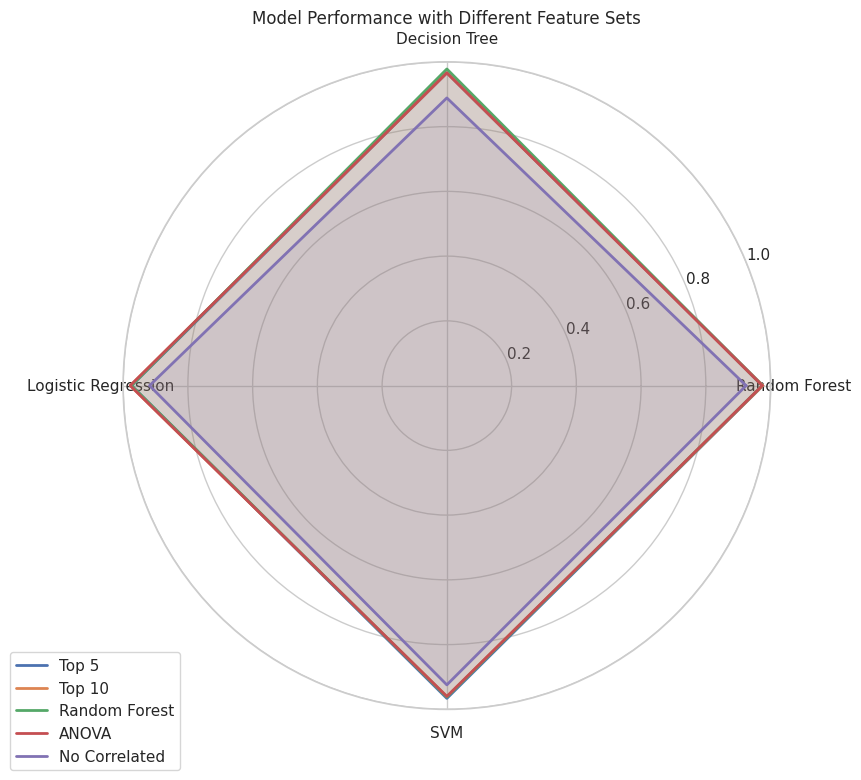


Feature selection process completed successfully!
All visualizations have been saved as PNG files.


In [38]:
# Create a radar chart to compare performance across different feature sets
def radar_plot(results_dict):
    # Prepare data
    methods = list(results_dict.keys())
    models = list(results_dict[methods[0]].keys())

    # Create a figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, polar=True)

    # Compute angle for each model
    angles = np.linspace(0, 2*np.pi, len(models), endpoint=False)
    angles = np.append(angles, angles[0])  # Close the loop

    # Plot each method
    for method, results in results_dict.items():
        values = [results[model] for model in models]
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, label=method)
        ax.fill(angles, values, alpha=0.1)

    # Set labels and title
    ax.set_thetagrids(np.degrees(angles[:-1]), models)
    ax.set_ylim(0, 1)
    plt.title('Model Performance with Different Feature Sets')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    plt.savefig('feature_selection_comparison.png')
    plt.show()

# Prepare results for radar plot
all_results = {
    "Top 5": results_top5,
    "Top 10": results_top10,
    "Random Forest": results_rf,
    "ANOVA": results_anova,
    "No Correlated": results_no_corr
}

radar_plot(all_results)

print("\nFeature selection process completed successfully!")
print("All visualizations have been saved as PNG files.")